In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_train = pd.read_csv('./train.csv',index_col = 'id')
df_test = pd.read_csv('./test.csv',index_col =  'id')
df_train.sample(5)

,keyword,location,text,target
id,,,,
5201,fatalities,NaN,RCMP confirm fatalities in two-vehicle crash: ...,1
8121,rescued,"Huntley, IL",We rescued my dog at least 9 years ago ?? she'...,0
3766,destruction,NaN,'Every kingdom divided against itself is heade...,0
6020,hazardous,NaN,It's getting to be hazardous getting into this...,1
10830,wrecked,NaN,@jt_ruff23 @cameronhacker and I wrecked you both,0


In [5]:
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)

Train shape: (7613, 4)
Test shape: (3263, 3)


In [6]:

for df in [df_train, df_test]:
    for col in df.columns:
        print(col,np.round(sum(df[col].isna())/len(df_train),4),'na value')
    print()


keyword 0.008 na value
location 0.3327 na value
text 0.0 na value
target 0.0 na value

keyword 0.0034 na value
location 0.1451 na value
text 0.0 na value



In [7]:
df_train.keyword.fillna("unknown",inplace=True)
df_train.location.fillna("unknown",inplace=True)
df_test.keyword.fillna("unknown",inplace=True)
df_test.location.fillna("unknown",inplace=True)

In [11]:
top30_loc = df_train.groupby(['location']).location.count().sort_values(ascending=False)[:30]

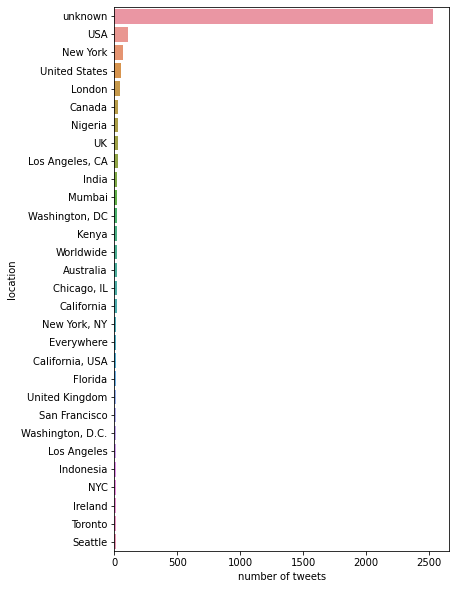

In [14]:
plt.figure(figsize = (6,10))
sns.barplot(x = top30_loc, y = top30_loc.index);
plt.xlabel('number of tweets');

([<matplotlib.patches.Wedge at 0x7f4eb064d2b0>,
 [Text(-0.7937076652469164, 0.7615957865746691, 'unknown'),
  Text(0.15227284273263503, -1.0894094645109902, 'USA'),
  Text(0.32831462234280484, -1.0498616617230585, 'New York'),
  Text(0.44514627231030723, -1.0059049638252304, 'United States'),
  Text(0.5329296013568127, -0.962281684330357, 'London'),
  Text(0.5984103976383511, -0.9229869966572176, 'Canada'),
  Text(0.6468979063429282, -0.8896758391510563, 'Nigeria'),
  Text(0.6919316652240989, -0.8551202083100397, 'UK'),
  Text(0.7335858940693338, -0.8196656245216681, 'Los Angeles, CA'),
  Text(0.7712211567130396, -0.7843582902208667, 'India'),
  Text(0.8043483966499274, -0.7503490233262727, 'Mumbai'),
  Text(0.833961354453331, -0.71729245031463, 'Washington, DC'),
  Text(0.8609333419981313, -0.6846851689907769, 'Kenya'),
  Text(0.8854077903882045, -0.6527273892827522, 'Worldwide'),
  Text(0.9075316418500534, -0.6215998061783373, 'Australia'),
  Text(0.9280078868468328, -0.5905940754444

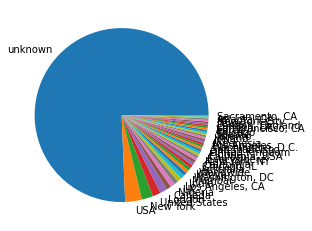

In [10]:
plt.pie(series[:40].values,labels=series[:40].index)
# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)

Text(0.5, 1.0, 'Real disaster or not distribution')

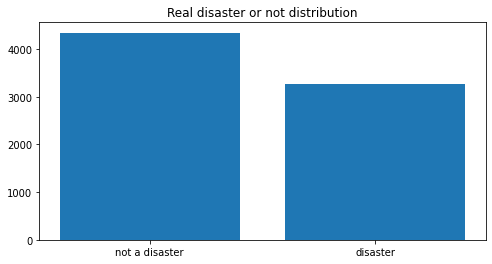

In [20]:

target_count = df_train.target.value_counts()
plt.figure(figsize=(8,4))
plt.bar(['not a disaster','disaster'], target_count.values)
plt.title("Real disaster or not distribution")